# Project Objective
- 감기, 눈병, 식중독, 천식, 피부염, 온열질환, 심뇌혈관 질환에 대한 예측 정보 
- → 전국 병원 정보와 연계하여 취약 지역 발굴 및 대책 방안 강구

# Data load
- Open API
- 공공데이터포털에서 데이터 활용 신청 후 키 받아와서 데이터 로드
- 사용 데이터
    1. 국민건강보험공단 질병예측 정보 : https://www.data.go.kr/data/15028050/openapi.do#tab_layer_detail_function
    2. 건강보험심사평가원_병원정보서비스 : https://www.data.go.kr/data/15001698/openapi.do?recommendDataYn=Y

[참고]
- API 활용 참고 사이트 https://jeong-pro.tistory.com/143
- xml 공식 문서 https://docs.python.org/ko/3/library/xml.etree.elementtree.html
- xml python으로 사용하기 https://ctkim.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-xml-%EB%AA%A8%EB%93%88

# 질병 예측 정보 EDA

- 입력 데이터

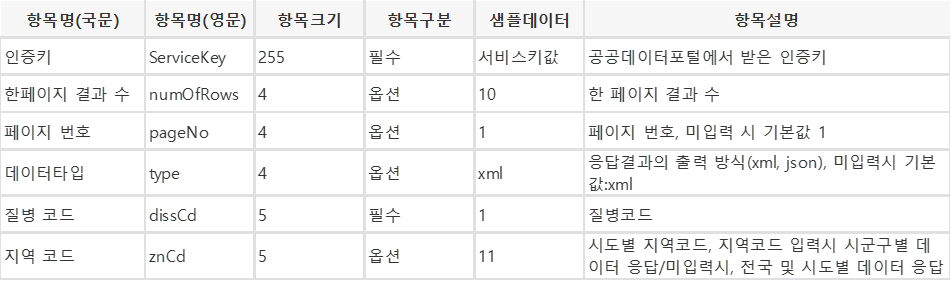

- 출력 데이터

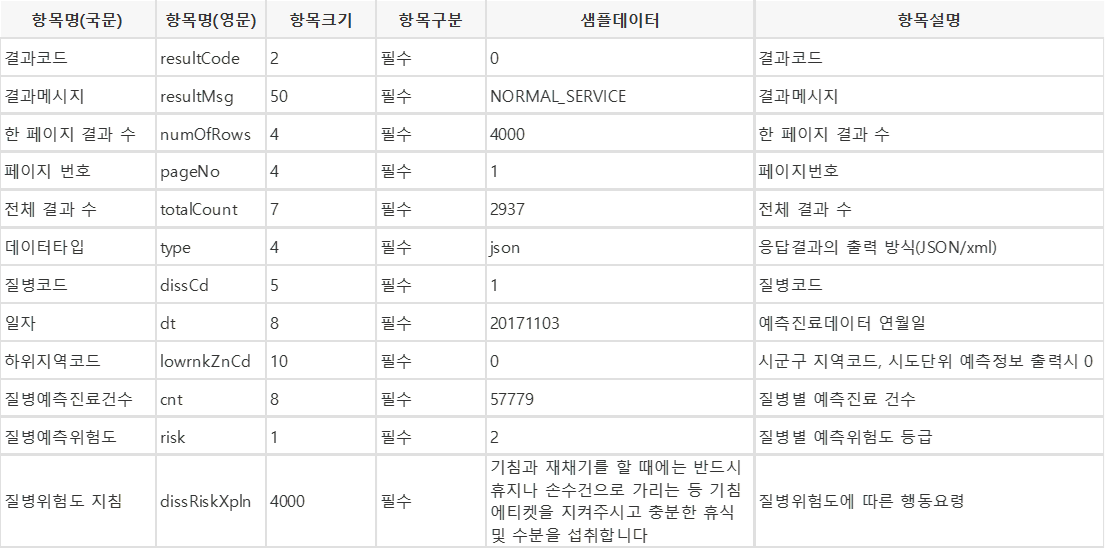

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import xml.etree.ElementTree as ET

## 샘플 데이터 생성
- 데이터프레임이 아닌, API 타입의 데이터라 데이터 정보와 구조를 파악하기 위해 샘플 데이터를 생성함

In [2]:
# key = ''
# pd.to_pickle(key, "./data/Healthcare Facilities/serviceKey.pkl")
# pd.read_pickle("./data/Healthcare Facilities/serviceKey.pkl")

In [7]:
# 질병예측 정보 데이터 로드
url = 'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo'
serviceKey = pd.read_pickle("./data/Healthcare Facilities/serviceKey.pkl")
params ={'serviceKey' : serviceKey, 
         'numOfRows' : '1', 'pageNo' : '1', 'type' : 'xml', 'dissCd' : '1', 'znCd' : '11' }

response = requests.get(url, params=params)
root = ET.fromstring(response.content)
# print(response.content)

In [105]:
# root 구조 파악하기
for child in root:
    print(child.tag, child.text)
    for cont1 in child:
        print("   ", cont1.tag, cont1.text)
        for cont2 in cont1:
            print("\t", cont2.tag, cont2.text)
            for cont3 in cont2:
                print("\t   ", cont3.tag, cont3.text)
    print()

header None
    resultCode 0
    resultMsg NORMAL_SERVICE
    type xml

body None
    items None
	 item None
	    dissCd 1
	    dt 20240307
	    znCd 11
	    lowrnkZnCd 11110
	    cnt 1130
	    risk 2
	    dissRiskXpln 기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.
    totalCount 75
    numOfRows 1
    pageNo 1



In [2]:
# 코드표
dissCds = {1:"감기", 2:"눈병", 3:"식중독", 4:"피부염"}
znCds = {11:"서울", 26:"부산", 27:"대구", 28:"인천", 29:"광주", 30:"대전", 31:"울산",
       41:"경기", 42:"강원", 43:"충북", 44:"충남", 45:"전북", 46:"전남", 47:"경북", 48:"경남", 49:"제주", 99:"전국"}
riskCds = {1:"관심", 2:"주의", 3:"경고", 4:"위험"}

## 데이터프레임 생성

In [3]:
# 응답 받아오는 함수 생성
def response(dissCd, znCd, rows=10, pg=1, tp='xml'):
    # 데이터 받아오기
    url = 'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo'
    params ={'serviceKey' : '', 
             'numOfRows' : rows, 'pageNo' : pg, 'type' : tp, 'dissCd' : dissCd, 'znCd' : znCd}
    response = requests.get(url, params=params)
    root = ET.fromstring(response.content)
    
    # 필요 요소 저장하기
    totalCnt = root.find("body/totalCount")
    items = root.findall("body/items/item")
    
    return {"totalCount": totalCnt.text, "items": items}

In [12]:
# 각 item별 데이터 항목 추출 함수 생성
def item_info(item):
    output = {}
    for elem in item:
        output[elem.tag] = elem.text
    return output

In [122]:
response(dissCd=1, znCd=11, rows=3)

{'totalCount': '75',
 'items': [<Element 'item' at 0x00000197E891BAE0>,
  <Element 'item' at 0x00000197E891B270>,
  <Element 'item' at 0x00000197E891BB80>]}

In [121]:
for item in response(dissCd=1, znCd=11, rows=3)["items"]:
    print(item_info(item))

{'dissCd': '1', 'dt': '20240307', 'znCd': '11', 'lowrnkZnCd': '11110', 'cnt': '1130', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}
{'dissCd': '1', 'dt': '20240307', 'znCd': '11', 'lowrnkZnCd': '11140', 'cnt': '922', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}
{'dissCd': '1', 'dt': '20240307', 'znCd': '11', 'lowrnkZnCd': '11170', 'cnt': '1696', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}


In [167]:
# 질병코드별 데이터 프레임 생성

diss1_tcnt = {}
df_1 = pd.DataFrame()

for zncd in list(znCds.keys())[:-1]:  # znCd = 99 일때 에러 발생해서 제외함
    res = response(rows=100, dissCd=1, znCd=zncd)
    diss1_tcnt["zncd"] = res["totalCount"]
    
    a = [item_info(item) for item in res["items"]]
    df_1 = pd.concat([df_1, pd.DataFrame(a)])

df_1.reset_index(drop=True, inplace=True)
df_1

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240307,11,11110,1130,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
1,1,20240307,11,11140,922,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
2,1,20240307,11,11170,1696,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
3,1,20240307,11,11200,2129,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
4,1,20240307,11,11215,2661,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
...,...,...,...,...,...,...,...
719,1,20240307,49,49130,1159,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
720,1,20240308,49,49110,3469,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
721,1,20240308,49,49130,1076,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
722,1,20240309,49,49110,3159,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...


In [5]:
# 위에서 생성한 2개의 함수를 활용, 질병 코드별로 데이터프레임 생성
def make_df(dissCd):
    diss1_tcnt = {}
    df = pd.DataFrame()

    for zncd in list(znCds.keys())[:-1]:  # znCd = 99 일때 에러 발생해서 제외함
        res = response(rows=100, dissCd=dissCd, znCd=zncd)
        diss1_tcnt["zncd"] = res["totalCount"]

        a = [item_info(item) for item in res["items"]]
        df = pd.concat([df, pd.DataFrame(a)])
        
    df.reset_index(drop=True, inplace=True)
    return df

In [175]:
df1 = make_df(1)
df2 = make_df(2)
df3 = make_df(3)
df4 = make_df(4)

df1.shape, df2.shape, df3.shape, df4.shape

((724, 7), (724, 7), (724, 7), (724, 7))

In [176]:
# 240307 데이터프레임 저장
df1.to_csv("./data/Healthcare Facilities/df1.csv")
df2.to_csv("./data/Healthcare Facilities/df2.csv")
df3.to_csv("./data/Healthcare Facilities/df3.csv")
df4.to_csv("./data/Healthcare Facilities/df4.csv")

In [180]:
pd.read_csv("./data/Healthcare Facilities/df1.csv")

,Unnamed: 0,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,0,1,20240307,11,11110,1130,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
1,1,1,20240307,11,11140,922,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
2,2,1,20240307,11,11170,1696,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
3,3,1,20240307,11,11200,2129,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
4,4,1,20240307,11,11215,2661,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
...,...,...,...,...,...,...,...,...
719,719,1,20240307,49,49130,1159,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
720,720,1,20240308,49,49110,3469,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
721,721,1,20240308,49,49130,1076,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
722,722,1,20240309,49,49110,3159,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...


## 데이터 수, 분포 확인
- 240309

In [5]:
# 질병코드별 데이터 프레임 생성

diss1_tcnt = {}
df_1 = pd.DataFrame()

for zncd in list(znCds.keys())[:-1]:  # znCd = 99 일때 에러 발생해서 제외함
    res = response(rows=100, dissCd=1, znCd=zncd)
    diss1_tcnt["zncd"] = res["totalCount"]
    
    a = [item_info(item) for item in res["items"]]
    df_1 = pd.concat([df_1, pd.DataFrame(a)])

df_1.reset_index(drop=True, inplace=True)
df_1

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240309,11,11110,1046,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
1,1,20240309,11,11140,853,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
2,1,20240309,11,11170,1600,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
3,1,20240309,11,11200,2008,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
4,1,20240309,11,11215,2464,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
...,...,...,...,...,...,...,...
719,1,20240309,49,49130,1017,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
720,1,20240310,49,49110,1639,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
721,1,20240310,49,49130,431,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
722,1,20240311,49,49110,5140,3,발열이나 호흡기 증상이 있다면 외출을 삼가되 외출시에는 마스크를 착용하고 가까운 의...


In [11]:
df_1.groupby("dt")["risk"].value_counts()

dt        risk
20240309  2       212
          1        24
          3        14
20240310  1       250
20240311  3       159
          4        65
Name: risk, dtype: int64

In [12]:
df_1["dt"].value_counts()

20240309    250
20240310    250
20240311    224
Name: dt, dtype: int64

<AxesSubplot:xlabel='znCd', ylabel='count'>

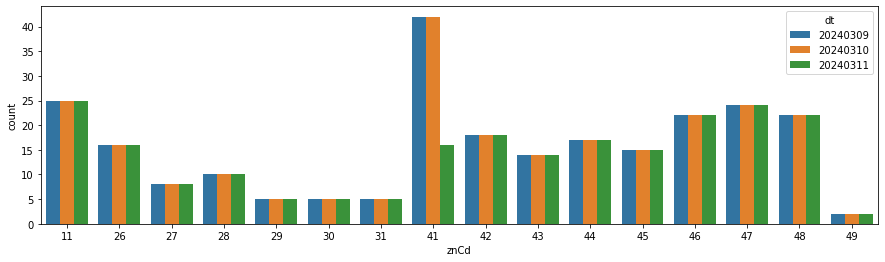

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_1, x="znCd", hue="dt")

- 41지역(경기)의 2일 뒤 예측 정보 없음

<AxesSubplot:xlabel='lowrnkZnCd', ylabel='count'>

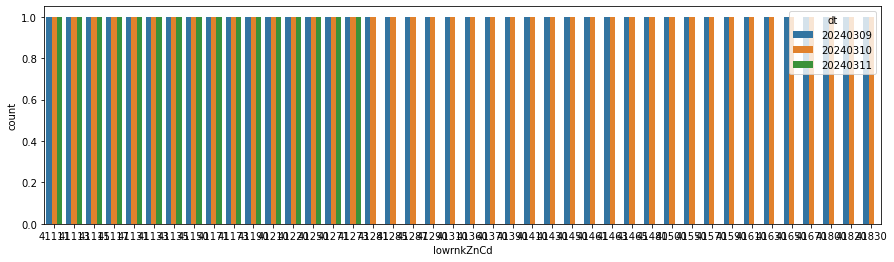

In [20]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_1[df_1["znCd"]=="41"], x="lowrnkZnCd", hue="dt")

In [40]:
# 2일 뒤 예측 정보 없는 지역 리스트
zn_41 = df_1[df_1["znCd"]=="41"]["lowrnkZnCd"].unique()
zn_notnull = df_1[(df_1["znCd"]=="41")&(df_1["dt"]=="20240311")]["lowrnkZnCd"].unique()
zn_null = [x for x in zn_41 if x not in zn_notnull]
print(f"{len(zn_null)}\n{zn_null}")

26
['41281', '41285', '41287', '41290', '41310', '41360', '41370', '41390', '41410', '41430', '41450', '41461', '41463', '41465', '41480', '41500', '41550', '41570', '41590', '41610', '41630', '41650', '41670', '41800', '41820', '41830']


In [43]:
df_1[["risk","dissRiskXpln"]].nunique()

risk            4
dissRiskXpln    4
dtype: int64

## 240310

In [7]:
# 240310 데이터
df1 = make_df(1)
df1

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240310,11,11110,285,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
1,1,20240310,11,11140,233,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
2,1,20240310,11,11170,429,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
3,1,20240310,11,11200,539,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
4,1,20240310,11,11215,661,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
...,...,...,...,...,...,...,...
719,1,20240310,49,49130,447,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
720,1,20240311,49,49110,5270,4,"고위험 집단(만성심장폐질환, 천식, 당뇨병 환자, 임산부, 65세 이상 어르신 등)..."
721,1,20240311,49,49130,1817,3,발열이나 호흡기 증상이 있다면 외출을 삼가되 외출시에는 마스크를 착용하고 가까운 의...
722,1,20240312,49,49110,3244,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dissCd        724 non-null    object
 1   dt            724 non-null    object
 2   znCd          724 non-null    object
 3   lowrnkZnCd    724 non-null    object
 4   cnt           724 non-null    object
 5   risk          724 non-null    object
 6   dissRiskXpln  724 non-null    object
dtypes: object(7)
memory usage: 39.7+ KB


In [18]:
for col in ["cnt", "risk"]:
    df1[col] = df1[col].astype("int")

<AxesSubplot:xlabel='dt', ylabel='risk'>

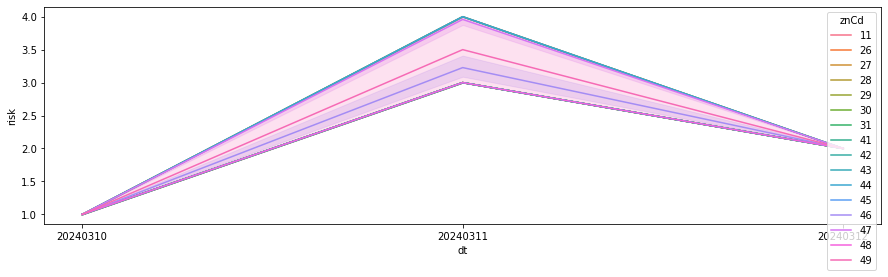

In [19]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df1, x="dt", y="risk", hue="znCd")

### 0307 데이터 로드

In [22]:
df1_0307 = pd.read_csv("./data/Healthcare Facilities/df1.csv", index_col="Unnamed: 0")
df1_0307

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240307,11,11110,1130,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
1,1,20240307,11,11140,922,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
2,1,20240307,11,11170,1696,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
3,1,20240307,11,11200,2129,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
4,1,20240307,11,11215,2661,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
...,...,...,...,...,...,...,...
719,1,20240307,49,49130,1159,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
720,1,20240308,49,49110,3469,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
721,1,20240308,49,49130,1076,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
722,1,20240309,49,49110,3159,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...


In [24]:
df1_0307.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 723
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dissCd        724 non-null    int64 
 1   dt            724 non-null    int64 
 2   znCd          724 non-null    int64 
 3   lowrnkZnCd    724 non-null    int64 
 4   cnt           724 non-null    int64 
 5   risk          724 non-null    int64 
 6   dissRiskXpln  724 non-null    object
dtypes: int64(6), object(1)
memory usage: 61.4+ KB


In [34]:
for col in ["dt","znCd","lowrnkZnCd"]:
    df1_0307[col] = df1_0307[col].astype("string")

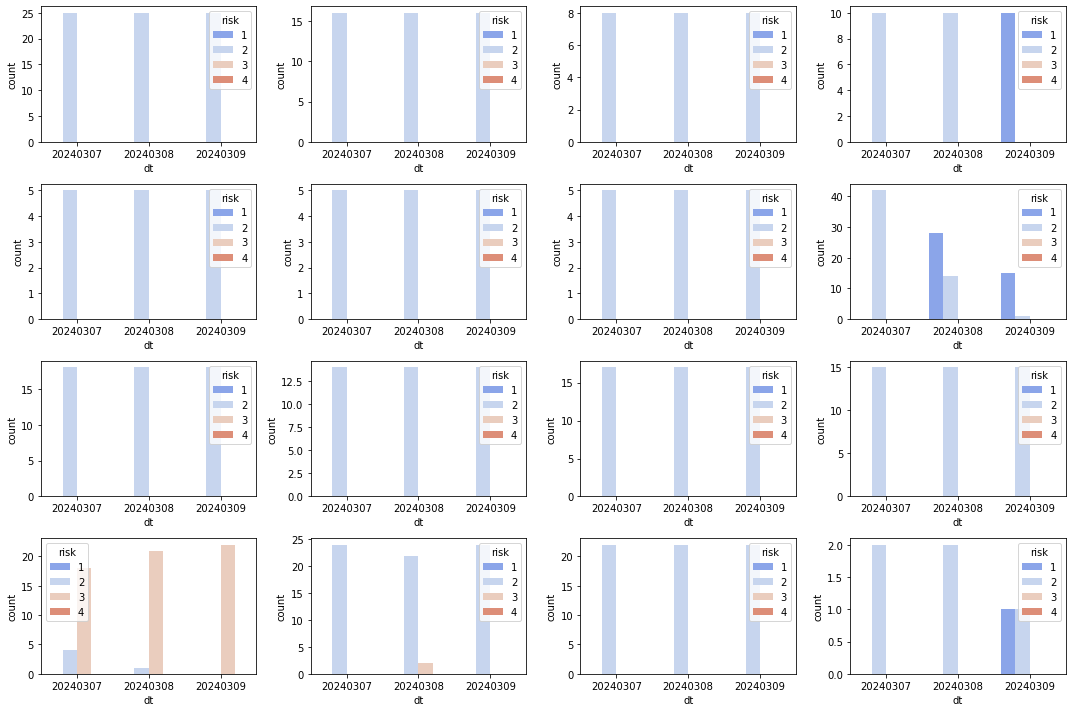

In [71]:
# 날짜 변화에 따른 risk 변화
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,10))

for i, znCd in enumerate((df1["znCd"].unique())):
    sns.countplot(data=df1_0307[df1_0307["znCd"]==znCd], x="dt", hue="risk", hue_order=[1,2,3,4], palette="coolwarm", ax=ax[i//4,i%4])
plt.tight_layout()

### risk-cnt 관계

In [61]:
import warnings
warnings.filterwarnings(action='ignore')

<AxesSubplot:xlabel='znCd', ylabel='cnt'>

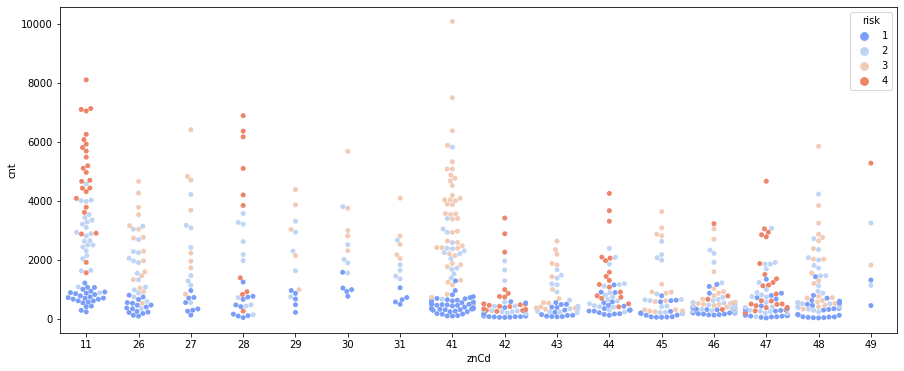

In [86]:
plt.figure(figsize=(15,6))
sns.swarmplot(data=df1, x="znCd", y="cnt", hue="risk", palette="coolwarm")

<AxesSubplot:xlabel='znCd', ylabel='cnt'>

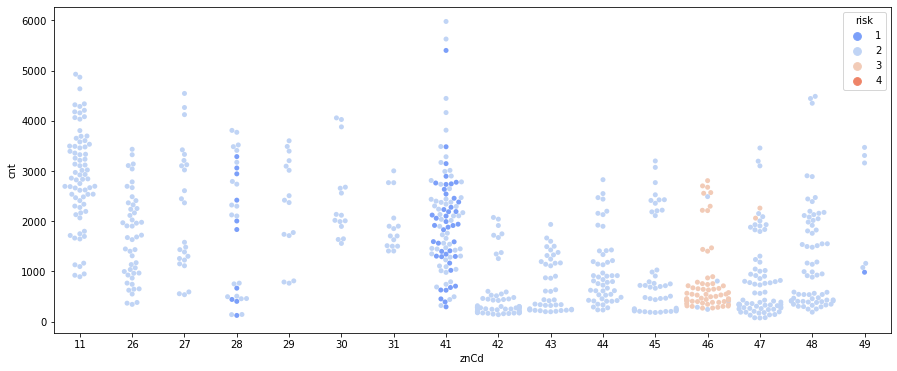

In [87]:
# 0307 데이터
plt.figure(figsize=(15,6))
sns.swarmplot(data=df1_0307, x="znCd", y="cnt", hue="risk", hue_order=[1,2,3,4], palette="coolwarm")

In [64]:
# 0307~0312
df1_6days = pd.concat([df1_0307, df1], axis=0, ignore_index=True)
df1_6days

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240307,11,11110,1130,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
1,1,20240307,11,11140,922,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
2,1,20240307,11,11170,1696,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
3,1,20240307,11,11200,2129,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
4,1,20240307,11,11215,2661,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
...,...,...,...,...,...,...,...
1443,1,20240310,49,49130,447,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
1444,1,20240311,49,49110,5270,4,"고위험 집단(만성심장폐질환, 천식, 당뇨병 환자, 임산부, 65세 이상 어르신 등)..."
1445,1,20240311,49,49130,1817,3,발열이나 호흡기 증상이 있다면 외출을 삼가되 외출시에는 마스크를 착용하고 가까운 의...
1446,1,20240312,49,49110,3244,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...


<AxesSubplot:xlabel='znCd', ylabel='cnt'>

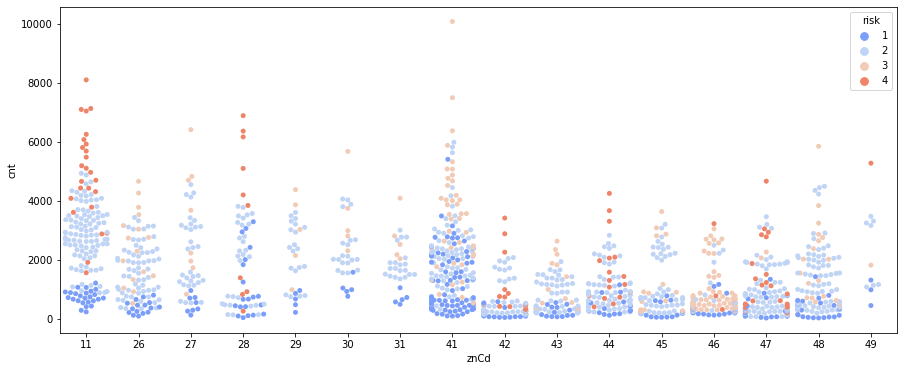

In [65]:
# 0307~0312
plt.figure(figsize=(15,6))
sns.swarmplot(data=df1_6days, x="znCd", y="cnt", hue="risk", palette="coolwarm")

- cnt 값에 따라 risk가 바뀌는 구간이 명확할 것이라고 추정하고 시각화 하였으나, 명확한 구분 기준이 없어 보인다.
- 어느 정도의 비례 관계는 있는 것으로 보인다.
---
- 지역별 크기와 인구 수와 cnt가 크게 비례할 것으로 보인다.
    - 41(경기) 지역은 cnt가 10000이 넘어가도 risk가 4단계가 아니기 때문.
    - 지역 규모와 비교할 필요가 있어보인다. -> 인구 수 필요?

# 병원 정보

## 샘플 데이터 생성

In [108]:
pd.read_xml("./data/Healthcare Facilities/response_1710059367433.xml")

,resultCode,resultMsg,items,numOfRows,pageNo,totalCount
0,0.0,NORMAL SERVICE.,NaN,NaN,NaN,NaN
1,NaN,None,NaN,100.0,1.0,43.0


In [8]:
url = 'https://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList'
params = {'serviceKey' : serviceKey,
          'numOfRows' : '1', 'pageNo' : '1', 'sidoCd' : '110000', 'clCd' : '11'}

response = requests.get(url, params=params)
root = ET.fromstring(response.content)

In [99]:
# root 구조 파악하기
for child in root:
    print(child.tag, child.text)
    for cont1 in child:
        print("   ", cont1.tag, cont1.text)
        for cont2 in cont1:
            print("\t", cont2.tag, cont2.text)
            for cont3 in cont2:
                print("\t   ", cont3.tag, cont3.text)
                for cont4 in cont3:
                    print("\t\t", cont4.tag, cont4.text)
    print()

header None
    resultCode 00
    resultMsg NORMAL SERVICE.

body None
    items None
	 item None
	    addr 서울특별시 영등포구 63로 10, 여의도성모병원 (여의도동)
	    clCd 11
	    clCdNm 종합병원
	    cmdcGdrCnt 0
	    cmdcIntnCnt 0
	    cmdcResdntCnt 0
	    cmdcSdrCnt 0
	    detyGdrCnt 0
	    detyIntnCnt 0
	    detyResdntCnt 0
	    detySdrCnt 3
	    drTotCnt 166
	    emdongNm 여의도동
	    estbDd 19860820
	    hospUrl http://www.cmcujb.or.kr/
	    mdeptGdrCnt 1
	    mdeptIntnCnt 0
	    mdeptResdntCnt 24
	    mdeptSdrCnt 138
	    pnursCnt 0
	    postNo 07345
	    sgguCd 110013
	    sgguCdNm 영등포구
	    sidoCd 110000
	    sidoCdNm 서울
	    telno 1661-7575
	    XPos 126.9367517
	    YPos 37.5183253
	    yadmNm 가톨릭대학교 여의도성모병원
	    ykiho JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ3OSQyNjEyMjIjODEjJDEjJDIjJDgz
	 item None
	    addr 서울특별시 은평구 통일로 1021, (진관동)
	    clCd 11
	    clCdNm 종합병원
	    cmdcGdrCnt 0
	    cmdcIntnCnt 0
	    cmdcResdntCnt 0
	    cmdcSdrCnt 0
	    detyGdrCnt 0
	    detyIntnCnt 0
	    detyResdnt

	    mdeptIntnCnt 0
	    mdeptResdntCnt 0
	    mdeptSdrCnt 18
	    pnursCnt 0
	    postNo 07505
	    sgguCd 110003
	    sgguCdNm 강서구
	    sidoCd 110000
	    sidoCdNm 서울
	    telno 02-2660-7500
	    XPos 126.7963265
	    YPos 37.5620454
	    yadmNm 우리들병원
	    ykiho JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQyIyQ3IyQwMCQzNjE0ODEjNTEjJDEjJDIjJDgz
	 item None
	    addr 서울특별시 은평구 통일로 873, (갈현동)
	    clCd 11
	    clCdNm 종합병원
	    cmdcGdrCnt 0
	    cmdcIntnCnt 0
	    cmdcResdntCnt 0
	    cmdcSdrCnt 0
	    detyGdrCnt 0
	    detyIntnCnt 0
	    detyResdntCnt 0
	    detySdrCnt 0
	    drTotCnt 24
	    emdongNm 갈현동
	    estbDd 19800128
	    hospUrl www.cgss.co.kr/
	    mdeptGdrCnt 1
	    mdeptIntnCnt 0
	    mdeptResdntCnt 0
	    mdeptSdrCnt 23
	    pnursCnt 0
	    postNo 03330
	    sgguCd 110015
	    sgguCdNm 은평구
	    sidoCd 110000
	    sidoCdNm 서울
	    telno 02-350-3300
	    XPos 126.9197006
	    YPos 37.6208615
	    yadmNm 의료법인 청구성심병원
	    ykiho JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ

In [114]:
tag_li = [elmt.tag for elmt in root[1][0][0]]
print(f"{len(tag_li)}\n{tag_li}")

30
['addr', 'clCd', 'clCdNm', 'cmdcGdrCnt', 'cmdcIntnCnt', 'cmdcResdntCnt', 'cmdcSdrCnt', 'detyGdrCnt', 'detyIntnCnt', 'detyResdntCnt', 'detySdrCnt', 'drTotCnt', 'emdongNm', 'estbDd', 'hospUrl', 'mdeptGdrCnt', 'mdeptIntnCnt', 'mdeptResdntCnt', 'mdeptSdrCnt', 'pnursCnt', 'postNo', 'sgguCd', 'sgguCdNm', 'sidoCd', 'sidoCdNm', 'telno', 'XPos', 'YPos', 'yadmNm', 'ykiho']


In [174]:
items = root.findall("body/items/item")
a = [item_info(item) for item in items]
df_hos = pd.DataFrame(a)    
df_hos.head(2)

,addr,clCd,clCdNm,cmdcGdrCnt,cmdcIntnCnt,cmdcResdntCnt,cmdcSdrCnt,detyGdrCnt,detyIntnCnt,detyResdntCnt,...,postNo,sgguCd,sgguCdNm,sidoCd,sidoCdNm,telno,XPos,YPos,yadmNm,ykiho
0,"서울특별시 영등포구 63로 10, 여의도성모병원 (여의도동)",11,종합병원,0,0,0,0,0,0,0,...,07345,110013,영등포구,110000,서울,1661-7575,126.9367517,37.5183253,가톨릭대학교 여의도성모병원,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...
1,"서울특별시 은평구 통일로 1021, (진관동)",11,종합병원,0,0,0,0,0,0,0,...,03312,110015,은평구,110000,서울,02-1811-7755,126.9161912,37.6334945,가톨릭대학교 은평성모병원,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...


In [175]:
df_hos.shape

(43, 30)

In [129]:
df_hos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   addr            43 non-null     object
 1   clCd            43 non-null     object
 2   clCdNm          43 non-null     object
 3   cmdcGdrCnt      43 non-null     object
 4   cmdcIntnCnt     43 non-null     object
 5   cmdcResdntCnt   43 non-null     object
 6   cmdcSdrCnt      43 non-null     object
 7   detyGdrCnt      43 non-null     object
 8   detyIntnCnt     43 non-null     object
 9   detyResdntCnt   43 non-null     object
 10  detySdrCnt      43 non-null     object
 11  drTotCnt        43 non-null     object
 12  emdongNm        43 non-null     object
 13  estbDd          43 non-null     object
 14  hospUrl         38 non-null     object
 15  mdeptGdrCnt     43 non-null     object
 16  mdeptIntnCnt    43 non-null     object
 17  mdeptResdntCnt  43 non-null     object
 18  mdeptSdrCnt 

In [161]:
# 결측치 확인
hos_na = df_hos.isna().sum()
hos_na[hos_na>0]

hospUrl    5
XPos       1
YPos       1
dtype: int64

In [171]:
# 결측치 있는 병원 정보
df_hos[df_hos.isna().any(axis=1)][["clCdNm","sgguCdNm", "yadmNm", 'hospUrl', 'XPos', 'YPos']]

,clCdNm,sgguCdNm,yadmNm,hospUrl,XPos,YPos
2,종합병원,강남구,강남베드로병원,NaN,127.0396045,37.4856196
5,종합병원,구로구,구로성심병원,NaN,126.8664159,37.4996715
7,종합병원,서초구,기쁨병원,NaN,NaN,NaN
19,종합병원,양천구,서울특별시서남병원,NaN,126.8331531,37.5120195
33,종합병원,강서구,이화여자대학교의과대학부속서울병원,NaN,126.8362668,37.5572629


# 질병 예측 - 병원 정보 함께 보기

In [177]:
# 서울 지역만 보기
df_hos["sgguCd"].unique()

array(['110013', '110015', '110001', '110002', '110018', '110005',
       '110017', '110021', '110022', '110019', '110003', '110007',
       '110016', '110008', '110020', '110014', '110010', '110004',
       '110024', '110006', '110023', '110025'], dtype=object)

In [182]:
df_hos["sgguCdNm"].unique()

array(['영등포구', '은평구', '강남구', '강동구', '송파구', '구로구', '중구', '서초구', '노원구',
       '중랑구', '강서구', '동대문구', '종로구', '동작구', '양천구', '용산구', '서대문구', '관악구',
       '강북구', '도봉구', '광진구', '금천구'], dtype=object)

In [181]:
df1[df1["znCd"]=="11"]["lowrnkZnCd"].unique()

array(['11110', '11140', '11170', '11200', '11215', '11230', '11260',
       '11290', '11305', '11320', '11350', '11380', '11410', '11440',
       '11470', '11500', '11530', '11545', '11560', '11590', '11620',
       '11650', '11680', '11710', '11740'], dtype=object)

In [190]:
# 세부지역코드표
lowZnCds = pd.read_excel("./data/Healthcare Facilities/lowrnkZnCds.xlsx")
lowZnCds_11 = lowZnCds[lowZnCds["상위 시도지역코드"]==11][["시군구지역코드", "시군구명"]]
lowZnCds_11.set_index("시군구지역코드", inplace=True)
lowZnCds_11

,시군구명
시군구지역코드,
11110,종로구
11140,중구
11170,용산구
11200,성동구
11215,광진구
11230,동대문구
11260,중랑구
11290,성북구
11305,강북구


In [202]:
len(df_hos["sgguCd"].unique())

22

In [201]:
len(df1[df1["znCd"]=="11"]["lowrnkZnCd"].unique())

25

In [199]:
df_hos[["sgguCd","sgguCdNm"]]

,sgguCd,sgguCdNm
0,110013,영등포구
1,110015,은평구
2,110001,강남구
3,110002,강동구
4,110018,송파구
5,110005,구로구
6,110017,중구
7,110021,서초구
8,110022,노원구
9,110019,중랑구


# [EDA2] 병원 정보

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import xml.etree.ElementTree as ET

In [3]:
# 각 item별 데이터 항목 추출 함수 생성
def item_info(item):
    output = {}
    for elem in item:
        output[elem.tag] = elem.text
    return output

## 데이터 로드

In [5]:
# 240320 SSL 오류로 인해 저장해둔 데이터 사용
df_hos = pd.read_pickle("./data/Healthcare Facilities/df_hos.pkl")
df_hos

,postNo,addr,yadmNm,XPos,YPos,clCd,clCdNm,drTotCnt,sidoCd,sidoCdNm,sgguCd,sgguCdNm,emdongNm,estbDd
0,03181,"서울특별시 종로구 새문안로 29, (평동)",강북삼성병원,126.967750,37.568408,01,상급종합,346,110000,서울,110016,종로구,평동,19790324
1,05030,"서울특별시 광진구 능동로 120-1, (화양동)",건국대학교병원,127.071828,37.540376,01,상급종합,360,110000,서울,110023,광진구,화양동,19821116
2,02447,"서울특별시 동대문구 경희대로 23, (회기동)",경희대학교병원,127.051852,37.594119,01,상급종합,404,110000,서울,110007,동대문구,회기동,19711005
3,08308,"서울특별시 구로구 구로동로 148, 고려대부속구로병원 (구로동)",고려대학교의과대학부속구로병원,126.884870,37.492052,01,상급종합,488,110000,서울,110005,구로구,구로동,19830831
4,06351,"서울특별시 강남구 일원로 81, (일원동, 삼성의료원)",삼성서울병원,127.085151,37.488298,01,상급종합,1326,110000,서울,110001,강남구,일원동,19940613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18897,03105,"서울특별시 종로구 종로 313, (창신동, 그린약국)",흥인경희한의원,127.012482,37.572343,93,한의원,1,110000,서울,110016,종로구,창신동,20170424
18898,08009,"서울특별시 양천구 목동동로12길 48, 경향빌딩 2층 (신정동)",희당한의원,126.876418,37.522275,93,한의원,1,110000,서울,110020,양천구,신정동,20020903
18899,01726,"서울특별시 노원구 중계로 120, 3층 (중계동, 득림빌딩)",희한의원,127.081810,37.646301,93,한의원,1,110000,서울,110022,노원구,중계동,20150422
18900,07526,"서울특별시 강서구 화곡로 429, 토피아 401호 (가양동)",힘내라한의원,126.855061,37.561526,93,한의원,2,110000,서울,110003,강서구,가양동,20171213


In [38]:
print(df_hos.shape)
df_hos.head(2)

(18902, 30)


,addr,clCd,clCdNm,cmdcGdrCnt,cmdcIntnCnt,cmdcResdntCnt,cmdcSdrCnt,detyGdrCnt,detyIntnCnt,detyResdntCnt,...,postNo,sgguCd,sgguCdNm,sidoCd,sidoCdNm,telno,XPos,YPos,yadmNm,ykiho
0,"서울특별시 종로구 새문안로 29, (평동)",01,상급종합,0,0,0,0,4,0,0,...,03181,110016,종로구,110000,서울,02-2001-2001,126.9677500,37.5684083,강북삼성병원,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...
1,"서울특별시 광진구 능동로 120-1, (화양동)",01,상급종합,0,0,0,0,0,0,0,...,05030,110023,광진구,110000,서울,1588-1533,127.0718276,37.5403764,건국대학교병원,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...


In [ ]:
# # 서울시 병원만 사용

# url = 'https://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList'
# serviceKey = pd.read_pickle("./data/Healthcare Facilities/serviceKey.pkl")
# params = {'serviceKey' : serviceKey,
#           'numOfRows' : '1000', 'pageNo' : '1', 'sidoCd' : '110000'}

# response = requests.get(url, params=params, verify=False)
# root = ET.fromstring(response.content)
# items = root.findall("body/items/item")
# a = [item_info(item) for item in items]
# df_hos = pd.DataFrame(a)

In [34]:
df_hos.columns

Index(['addr', 'clCd', 'clCdNm', 'cmdcGdrCnt', 'cmdcIntnCnt', 'cmdcResdntCnt',
       'cmdcSdrCnt', 'detyGdrCnt', 'detyIntnCnt', 'detyResdntCnt',
       'detySdrCnt', 'drTotCnt', 'emdongNm', 'estbDd', 'hospUrl',
       'mdeptGdrCnt', 'mdeptIntnCnt', 'mdeptResdntCnt', 'mdeptSdrCnt',
       'pnursCnt', 'postNo', 'sgguCd', 'sgguCdNm', 'sidoCd', 'sidoCdNm',
       'telno', 'XPos', 'YPos', 'yadmNm', 'ykiho'],
      dtype='object')

In [5]:
# 지리정보와 총 의사 수 컬럼만 사용
useCols = ['postNo', 'addr', 'yadmNm', 'XPos', 'YPos', 'clCd', 'clCdNm', 'drTotCnt', 
           'sidoCd', 'sidoCdNm', 'sgguCd', 'sgguCdNm', 'emdongNm', 'estbDd']

df_hos = df_hos[useCols]
df_hos.head()

,postNo,addr,yadmNm,XPos,YPos,clCd,clCdNm,drTotCnt,sidoCd,sidoCdNm,sgguCd,sgguCdNm,emdongNm,estbDd
0,03181,"서울특별시 종로구 새문안로 29, (평동)",강북삼성병원,126.9677500,37.5684083,01,상급종합,346,110000,서울,110016,종로구,평동,19790324
1,05030,"서울특별시 광진구 능동로 120-1, (화양동)",건국대학교병원,127.0718276,37.5403764,01,상급종합,360,110000,서울,110023,광진구,화양동,19821116
2,02447,"서울특별시 동대문구 경희대로 23, (회기동)",경희대학교병원,127.0518520,37.5941195,01,상급종합,404,110000,서울,110007,동대문구,회기동,19711005
3,08308,"서울특별시 구로구 구로동로 148, 고려대부속구로병원 (구로동)",고려대학교의과대학부속구로병원,126.8848701,37.4920520,01,상급종합,488,110000,서울,110005,구로구,구로동,19830831
4,06351,"서울특별시 강남구 일원로 81, (일원동, 삼성의료원)",삼성서울병원,127.0851508,37.4882977,01,상급종합,1326,110000,서울,110001,강남구,일원동,19940613


In [6]:
# 데이터 타입 변경
df_hos["XPos"] = df_hos["XPos"].astype(float)
df_hos["YPos"] = df_hos["YPos"].astype(float)
df_hos["drTotCnt"] = df_hos["drTotCnt"].astype(int)

df_hos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18902 entries, 0 to 18901
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   postNo    18902 non-null  object 
 1   addr      18902 non-null  object 
 2   yadmNm    18902 non-null  object 
 3   XPos      18642 non-null  float64
 4   YPos      18642 non-null  float64
 5   clCd      18902 non-null  object 
 6   clCdNm    18902 non-null  object 
 7   drTotCnt  18902 non-null  int32  
 8   sidoCd    18902 non-null  object 
 9   sidoCdNm  18902 non-null  object 
 10  sgguCd    18902 non-null  object 
 11  sgguCdNm  18902 non-null  object 
 12  emdongNm  18894 non-null  object 
 13  estbDd    18902 non-null  object 
dtypes: float64(2), int32(1), object(11)
memory usage: 1.9+ MB


## 결측치 확인

In [55]:
df_hos.info()
df_hos.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18902 entries, 0 to 18901
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   postNo    18902 non-null  object
 1   addr      18902 non-null  object
 2   yadmNm    18902 non-null  object
 3   XPos      18642 non-null  object
 4   YPos      18642 non-null  object
 5   clCd      18902 non-null  object
 6   clCdNm    18902 non-null  object
 7   drTotCnt  18902 non-null  object
 8   sidoCd    18902 non-null  object
 9   sidoCdNm  18902 non-null  object
 10  sgguCd    18902 non-null  object
 11  sgguCdNm  18902 non-null  object
 12  emdongNm  18894 non-null  object
 13  estbDd    18902 non-null  object
dtypes: object(14)
memory usage: 2.0+ MB


postNo        0
addr          0
yadmNm        0
XPos        260
YPos        260
clCd          0
clCdNm        0
drTotCnt      0
sidoCd        0
sidoCdNm      0
sgguCd        0
sgguCdNm      0
emdongNm      8
estbDd        0
dtype: int64

In [78]:
# 1. 결측치 확인: 읍면동 이름
df_hos[df_hos["emdongNm"].isnull()]

# 모두 서대문구 가재울 미래로 2 => 남가좌동

,postNo,addr,yadmNm,XPos,YPos,clCd,clCdNm,drTotCnt,sidoCd,sidoCdNm,sgguCd,sgguCdNm,emdongNm,estbDd
554,03711,"서울특별시 서대문구 가재울미래로 2, 별동상가동 3층 304-1,2/305-1,2호...",가재울정내과의원,126.917613,37.572838,31,의원,1,110000,서울,110010,서대문구,NaN,20180806
6270,03711,"서울특별시 서대문구 가재울미래로 2, 별동상가동 302호 (남가좌동, DMC파크뷰자이)",엘림이비인후과의원,126.917613,37.572838,31,의원,1,110000,서울,110010,서대문구,NaN,20160203
10157,03711,"서울특별시 서대문구 가재울미래로 2, 3층 303-1,303-2호 (남가좌동, DM...",휘소아청소년과의원,126.917613,37.572838,31,의원,1,110000,서울,110010,서대문구,NaN,20170817
11145,03711,"서울특별시 서대문구 가재울미래로 2, 별동상가동 301호 (남가좌동, DMC파크뷰자이)",디엠씨(DMC)플러스치과의원,126.917613,37.572838,51,치과의원,1,110000,서울,110010,서대문구,NaN,20151201
11569,03709,"서울특별시 서대문구 가재울미래로 2, 상가103동 105-1,105-2호 (남가좌동...",바른이 클래식 치과의원,126.917613,37.572838,51,치과의원,1,110000,서울,110010,서대문구,NaN,20211122
12522,03711,"서울특별시 서대문구 가재울미래로 2, 101동 101호 (남가좌동, DMC파크뷰자이)",서울클래식치과의원,126.917613,37.572838,51,치과의원,1,110000,서울,110010,서대문구,NaN,20170227
15326,03711,"서울특별시 서대문구 가재울미래로 2, 202동 101호 (남가좌동, DMC파크뷰자이)",가재울부부한의원,126.917613,37.572838,93,한의원,2,110000,서울,110010,서대문구,NaN,20161014
17421,03711,"서울특별시 서대문구 가재울미래로 2, 별동상가동 206-1,206-2호 (남가좌동,...",아이린한의원,126.917613,37.572838,93,한의원,1,110000,서울,110010,서대문구,NaN,20200106


In [81]:
# 결측치 채워주기
cond = df_hos["emdongNm"].isnull()
df_hos.loc[cond, "emdongNm"] = "남가좌동"
df_hos["emdongNm"].isnull().sum()

0

In [74]:
# 2. 결측치 확인: 좌표
df_hos[df_hos["XPos"].isnull()]

,postNo,addr,yadmNm,XPos,YPos,clCd,clCdNm,drTotCnt,sidoCd,sidoCdNm,sgguCd,sgguCdNm,emdongNm,estbDd
176,07632,"서울특별시 강서구 강서로 357, (내발산동)",서울필병원,NaN,NaN,21,병원,5,110000,서울,110003,강서구,내발산동,20230503
203,02249,"서울특별시 중랑구 면목로 310, 4,5,6,7층일부층 (면목동)",연세본병원,NaN,NaN,21,병원,6,110000,서울,110019,중랑구,면목동,20160502
546,07575,"서울특별시 강서구 양천로 490, 401, 501호 (등촌동)",가양삼성정형외과의원,NaN,NaN,31,의원,2,110000,서울,110003,강서구,등촌동,20240227
646,06627,"서울특별시 서초구 사임당로 180, 보원빌딩 2층 205호 (서초동)",강남스탠다드정형외과의원,NaN,NaN,31,의원,1,110000,서울,110021,서초구,서초동,20230421
659,06232,"서울특별시 강남구 강남대로 376, 5층 (역삼동)",강남에프엠의원,NaN,NaN,31,의원,2,110000,서울,110001,강남구,역삼동,20240219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,03383,"서울특별시 은평구 은평로 233, 2층 (녹번동)",토끼씨한의원,NaN,NaN,93,한의원,2,110000,서울,110015,은평구,녹번동,20230914
18699,07011,"서울특별시 동작구 사당로16길 25, 아람빌딩 1층 (사당동)",해송한의원,NaN,NaN,93,한의원,1,110000,서울,110008,동작구,사당동,20230816
18834,06568,"서울특별시 서초구 서초대로 3-4, 105호 (방배동, 디오슈페리움1차)",화리한의원,NaN,NaN,93,한의원,1,110000,서울,110021,서초구,방배동,20131101
18841,08093,"서울특별시 양천구 목동동로 67, 2층 (신정동)",화이팅한의원,NaN,NaN,93,한의원,2,110000,서울,110020,양천구,신정동,20230727


In [11]:
notnull = df_hos[df_hos["XPos"].notnull()]
notnull.reset_index(inplace=True)
notnull

,index,postNo,addr,yadmNm,XPos,YPos,clCd,clCdNm,drTotCnt,sidoCd,sidoCdNm,sgguCd,sgguCdNm,emdongNm,estbDd
0,0,03181,"서울특별시 종로구 새문안로 29, (평동)",강북삼성병원,126.967750,37.568408,01,상급종합,346,110000,서울,110016,종로구,평동,19790324
1,1,05030,"서울특별시 광진구 능동로 120-1, (화양동)",건국대학교병원,127.071828,37.540376,01,상급종합,360,110000,서울,110023,광진구,화양동,19821116
2,2,02447,"서울특별시 동대문구 경희대로 23, (회기동)",경희대학교병원,127.051852,37.594119,01,상급종합,404,110000,서울,110007,동대문구,회기동,19711005
3,3,08308,"서울특별시 구로구 구로동로 148, 고려대부속구로병원 (구로동)",고려대학교의과대학부속구로병원,126.884870,37.492052,01,상급종합,488,110000,서울,110005,구로구,구로동,19830831
4,4,06351,"서울특별시 강남구 일원로 81, (일원동, 삼성의료원)",삼성서울병원,127.085151,37.488298,01,상급종합,1326,110000,서울,110001,강남구,일원동,19940613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18637,18897,03105,"서울특별시 종로구 종로 313, (창신동, 그린약국)",흥인경희한의원,127.012482,37.572343,93,한의원,1,110000,서울,110016,종로구,창신동,20170424
18638,18898,08009,"서울특별시 양천구 목동동로12길 48, 경향빌딩 2층 (신정동)",희당한의원,126.876418,37.522275,93,한의원,1,110000,서울,110020,양천구,신정동,20020903
18639,18899,01726,"서울특별시 노원구 중계로 120, 3층 (중계동, 득림빌딩)",희한의원,127.081810,37.646301,93,한의원,1,110000,서울,110022,노원구,중계동,20150422
18640,18900,07526,"서울특별시 강서구 화곡로 429, 토피아 401호 (가양동)",힘내라한의원,126.855061,37.561526,93,한의원,2,110000,서울,110003,강서구,가양동,20171213


### >> 결측치 어떻게 할지????

## 지도 위에 시각화
- 참고 : https://velog.io/@eodud0582/Folium
- YPos, XPos 순으로 넣어줘야 제대로 시각화 됨

In [8]:
# pip install folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   --------------- ----------------------- 41.0/100.0 kB 653.6 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 955.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import folium

In [12]:
m = folium.Map(location=[37.5642135, 127.0016985], zoom_start=11)

for i in range(500):
    hos = notnull.loc[i]
    folium.Marker([hos["YPos"], hos["XPos"]], popup=hos["yadmNm"], tooltip=hos["yadmNm"]).add_to(m)
m

## 시군구별 병원 수

In [13]:
df_hos["sgguCdNm"].value_counts()

sgguCdNm
강남구     2883
서초구     1436
송파구     1263
강서구      942
강동구      882
영등포구     801
마포구      773
노원구      755
은평구      717
관악구      713
양천구      680
동대문구     613
구로구      601
중구       600
동작구      592
광진구      580
중랑구      564
성북구      550
성동구      486
종로구      479
강북구      471
서대문구     446
도봉구      379
금천구      368
용산구      328
Name: count, dtype: int64

In [15]:
# 한글 폰트 사용
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

<Axes: xlabel='sgguCdNm', ylabel='count'>

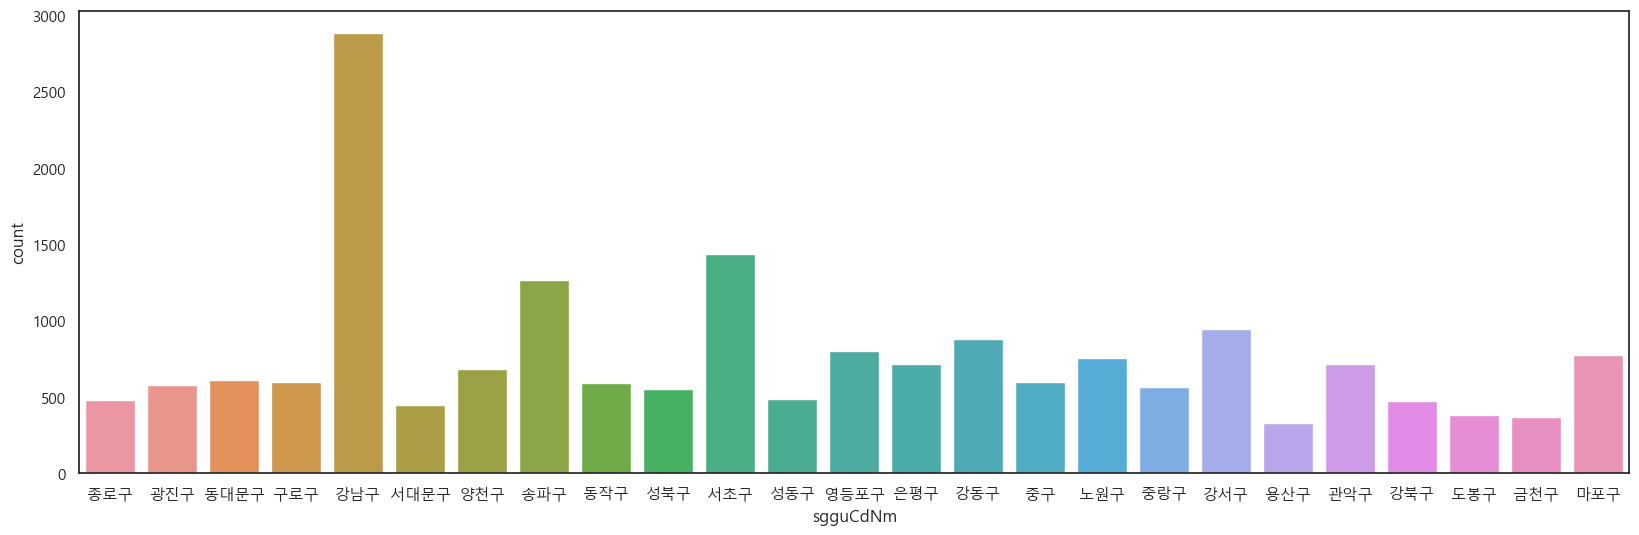

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_hos, x="sgguCdNm")

## 종별 병원 수

In [23]:
df_hos["clCdNm"].value_counts()

clCdNm
의원      9790
치과의원    4894
한의원     3626
병원       228
요양병원     110
한방병원      87
치과병원      60
종합병원      43
보건소       25
상급종합      14
정신병원      12
보건지소      10
조산원        3
Name: count, dtype: int64

In [25]:
df_hos["clCdNm"].value_counts(normalize=True) * 100

clCdNm
의원      51.793461
치과의원    25.891440
한의원     19.183155
병원       1.206222
요양병원     0.581949
한방병원     0.460269
치과병원     0.317427
종합병원     0.227489
보건소      0.132261
상급종합     0.074066
정신병원     0.063485
보건지소     0.052904
조산원      0.015871
Name: proportion, dtype: float64

<Axes: xlabel='clCdNm', ylabel='count'>

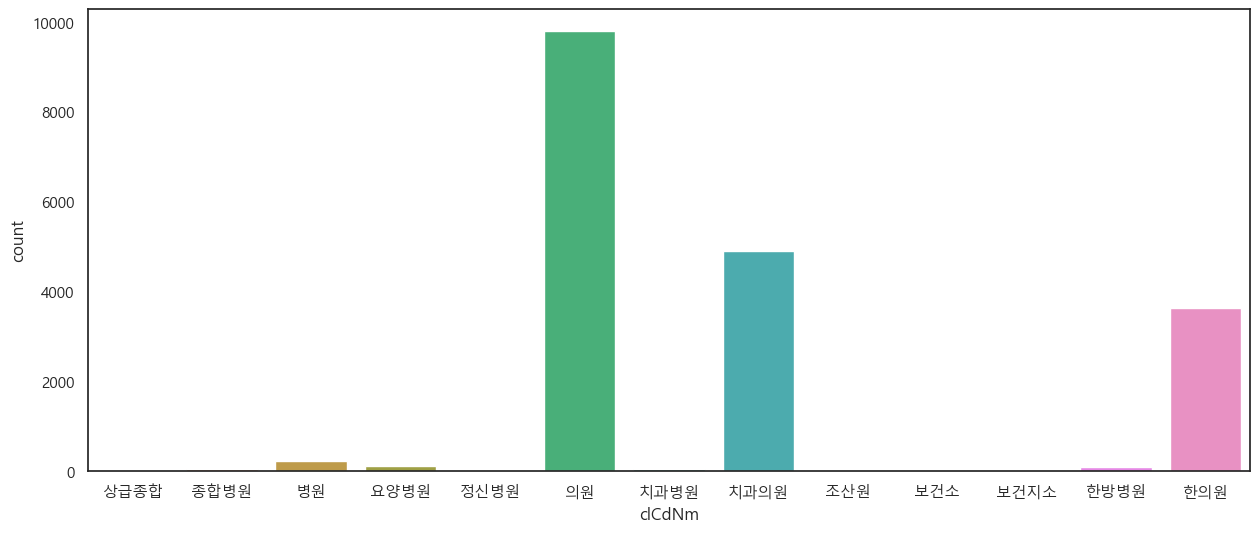

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_hos, x="clCdNm")

In [18]:
df_hos

,postNo,addr,yadmNm,XPos,YPos,clCd,clCdNm,drTotCnt,sidoCd,sidoCdNm,sgguCd,sgguCdNm,emdongNm,estbDd
0,03181,"서울특별시 종로구 새문안로 29, (평동)",강북삼성병원,126.967750,37.568408,01,상급종합,346,110000,서울,110016,종로구,평동,19790324
1,05030,"서울특별시 광진구 능동로 120-1, (화양동)",건국대학교병원,127.071828,37.540376,01,상급종합,360,110000,서울,110023,광진구,화양동,19821116
2,02447,"서울특별시 동대문구 경희대로 23, (회기동)",경희대학교병원,127.051852,37.594119,01,상급종합,404,110000,서울,110007,동대문구,회기동,19711005
3,08308,"서울특별시 구로구 구로동로 148, 고려대부속구로병원 (구로동)",고려대학교의과대학부속구로병원,126.884870,37.492052,01,상급종합,488,110000,서울,110005,구로구,구로동,19830831
4,06351,"서울특별시 강남구 일원로 81, (일원동, 삼성의료원)",삼성서울병원,127.085151,37.488298,01,상급종합,1326,110000,서울,110001,강남구,일원동,19940613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18897,03105,"서울특별시 종로구 종로 313, (창신동, 그린약국)",흥인경희한의원,127.012482,37.572343,93,한의원,1,110000,서울,110016,종로구,창신동,20170424
18898,08009,"서울특별시 양천구 목동동로12길 48, 경향빌딩 2층 (신정동)",희당한의원,126.876418,37.522275,93,한의원,1,110000,서울,110020,양천구,신정동,20020903
18899,01726,"서울특별시 노원구 중계로 120, 3층 (중계동, 득림빌딩)",희한의원,127.081810,37.646301,93,한의원,1,110000,서울,110022,노원구,중계동,20150422
18900,07526,"서울특별시 강서구 화곡로 429, 토피아 401호 (가양동)",힘내라한의원,126.855061,37.561526,93,한의원,2,110000,서울,110003,강서구,가양동,20171213


## 시군구별 병원 평균 의사 수

In [113]:
# 데이터 저장
df_hos.to_pickle("./data/Healthcare Facilities/df_hos.pkl")